In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- Another way of importing files
```python
from google.colab import files
uploaded = files.upload()
```



- Reading a csv file without libraries

```python
with open('spam.csv', 'r') as f:
    data = []
    for line in f:
            words = line.split(',')
            data.append((words[0], words[1:]))
    print(data)
```



# Machine Learning

In [21]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
mes = df['Message']
cat = df['Category']

In [31]:
type(mes)

pandas.core.series.Series

### Transforming the corpus into a matrix

In [10]:
vect = TfidfVectorizer()
pred = vect.fit_transform(mes)
pred.shape

(5572, 8709)

In [15]:
print(vect.get_feature_names_out()[10:100])

['0207' '02072069400' '02073162414' '02085076972' '021' '03' '04' '0430'
 '05' '050703' '0578' '06' '07' '07008009200' '07046744435' '07090201529'
 '07090298926' '07099833605' '07123456789' '0721072' '07732584351'
 '07734396839' '07742676969' '07753741225' '0776xxxxxxx' '07781482378'
 '07786200117' '077xxx' '078' '07801543489' '07808' '07808247860'
 '07808726822' '07815296484' '07821230901' '078498' '07880867867'
 '0789xxxxxxx' '07946746291' '0796xxxxxx' '07973788240' '07xxxxxxxxx' '08'
 '0800' '08000407165' '08000776320' '08000839402' '08000930705'
 '08000938767' '08001950382' '08002888812' '08002986030' '08002986906'
 '08002988890' '08006344447' '0808' '08081263000' '08081560665' '0825'
 '083' '0844' '08448350055' '08448714184' '0845' '08450542832'
 '08452810071' '08452810073' '08452810075over18' '0870' '08700435505150p'
 '08700469649' '08700621170150p' '08701213186' '08701237397' '08701417012'
 '08701417012150p' '0870141701216' '087016248' '08701752560'
 '087018728737' '087024118271

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(pred, cat, test_size=0.3)

In [17]:
X_test.shape

(1672, 8709)

## Creating the Model

In [18]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## Predicting

In [19]:
predictions = forest.predict(X_test)
predictions

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

## Confusion Matrix

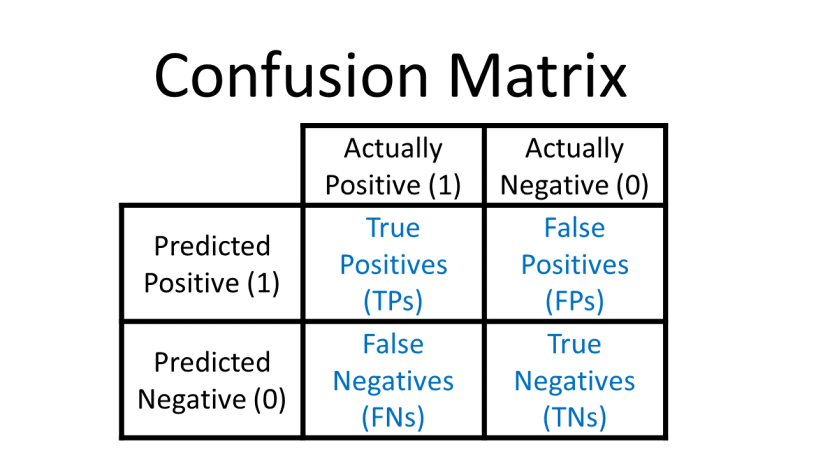

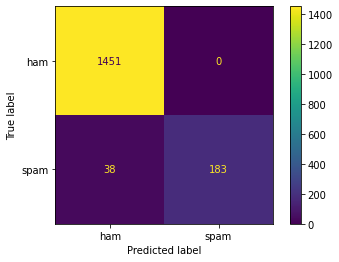

In [23]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=forest.classes_)
disp.plot()

In [25]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Report: \n', metrics.classification_report(y_test, predictions))

Accuracy:  0.9772727272727273
Report: 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1451
        spam       1.00      0.83      0.91       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# RNN

In [26]:
# Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [27]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df['Category'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
messages = df['Message'].values
X_train, X_test, y_train, y_test = train_test_split(messages, y, test_size=0.3)
type(messages)

numpy.ndarray

In [33]:
X_train

array(["Ooh, 4got, i'm gonna start belly dancing in moseley weds 6.30 if u want 2 join me, they have a cafe too.",
       'Ya, told..she was asking wats matter?',
       'You do your studies alone without anyones help. If you cant no need to study.',
       ..., 'Cold. Dont be sad dear',
       'Whats the staff name who is taking class for us?',
       "Aight that'll work, thanks"], dtype=object)

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- Each word is a column and every row is a message

In [35]:
vectorizer.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zouk', 'èn', 'ú1'], dtype=object)

In [42]:
X_train.toarray()[0].shape

(7195,)

In [40]:
vectorizer.get_feature_names_out().shape

(7195,)

In [43]:
X_train.shape[1]

7195

## Creating the Model

In [44]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                71960     
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 72,057
Trainable params: 72,057
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


390/390 [==============================] - 3s 5ms/step - loss: 0.0923 - accuracy: 0.9277 - val_loss: 0.0179 - val_accuracy: 0.9809
Epoch 2/20
390/390 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9846 - val_loss: 0.0110 - val_accuracy: 0.9880
Epoch 3/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9905 - val_loss: 0.0094 - val_accuracy: 0.9892
Epoch 4/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9954 - val_loss: 0.0096 - val_accuracy: 0.9898
Epoch 5/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9959 - val_loss: 0.0092 - val_accuracy: 0.9892
Epoch 6/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.9967 - val_loss: 0.0094 - val_accuracy: 0.9886
Epoch 7/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0029 - accuracy: 0.9959 - val_loss: 0.0094 - val_accuracy: 0.9898
Epoch 8/20
390/39

In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

53/53 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 0.9904
Loss:  0.008865109644830227
Accuracy:  0.9904305934906006


In [49]:
new_prediction = model.predict(X_test)
new_prediction = (new_prediction > 0.5)
print(new_prediction)

53/53 [==============================] - 0s 3ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


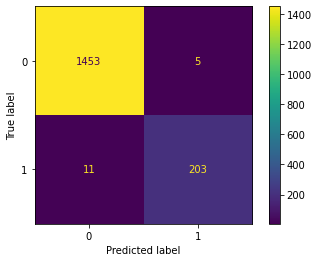

In [50]:
cm = confusion_matrix(y_test, new_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# RNN with Embedding

In [52]:
from keras.layers import Flatten, Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [67]:
X_train, X_test, y_train, y_test = train_test_split(messages, y, test_size=0.3)

In [68]:
# Keeping top 1000 words
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [69]:
X_train[0]

[52, 21, 3, 170, 120, 851, 9, 11, 5, 98, 440, 263, 34, 3, 4, 539, 62]

In [70]:
# If the sentence does not has 500 of length, it will be filled 
# with zeros (on the right)
X_train = pad_sequences(X_train, padding='post', maxlen=500)
X_test = pad_sequences(X_test, padding='post', maxlen=500)

In [71]:
X_train[0]

array([ 52,  21,   3, 170, 120, 851,   9,  11,   5,  98, 440, 263,  34,
         3,   4, 539,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [72]:
len(token.word_index)

7481

In [73]:
model = Sequential()
model.add(Embedding(input_dim=len(token.word_index), output_dim=50, 
                    input_length=500))
model.add(Flatten())
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           374050    
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                250010    
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 624,071
Trainable params: 624,071
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/20
390/390 [==============================] - 6s 14ms/step - loss: 0.0830 - accuracy: 0.8992 - val_loss: 0.0416 - val_accuracy: 0.9821
Epoch 2/20
390/390 [==============================] - 4s 10ms/step - loss: 0.0403 - accuracy: 0.9754 - val_loss: 0.0321 - val_accuracy: 0.9815
Epoch 3/20
390/390 [==============================] - 4s 10ms/step - loss: 0.0311 - accuracy: 0.9836 - val_loss: 0.0280 - val_accuracy: 0.9827
Epoch 4/20
390/390 [==============================] - 5s 12ms/step - loss: 0.0255 - accuracy: 0.9851 - val_loss: 0.0285 - val_accuracy: 0.9785
Epoch 5/20
390/390 [==============================] - 5s 12ms/step - loss: 0.0215 - accuracy: 0.9864 - val_loss: 0.0245 - val_accuracy: 0.9815
Epoch 6/20
390/390 [==============================] - 4s 10ms/step - loss: 0.0155 - accuracy: 0.9923 - val_loss: 0.0225 - val_accuracy: 0.9815
Epoch 7/20
390/390 [==============================] - 4s 10ms/step - loss: 0.0118 - accuracy: 0.9951 - val_loss: 0.0200 - val_accuracy: 0.9827

In [76]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

53/53 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9827
Loss:  0.016320032998919487
Accuracy:  0.9826555252075195
